# Chapter 1. Exploratory Data Analysis

pages 14-51

## History
- Probability Theory (the mathematical foundation for statistics)
    - developed in the  17th to 19th centuries
    - Thomas Bayes, Pierre-Simon Laplace, Carl Gauss
- Statistics
    - applied science concerned with analysis and modeling of data
    - Francis Galton and Karl Pearson
- Modern Statistics
    - roots back to 1800s 
    - R. A. Fisher (leading pioneer in the early 20th century)
        - experimental design
        - maximum likelihood estimation

(A) Classical statistics vs (B) Exploratory data analysis [EDA] 

(A) focused almost exclusively on inference

John W. Turkey in 1962
- wrote a seminal paper called "The Future of Data Analysis"
- proposed a new scientific discipline called _data analysis_
- forged links to the engineering and computer science communities
- coined the term 'bit'

## Elements of Structured Data

Sources
- images
- text
- clickstreams

### 2 basic types of structured data:
1. numeric
    1. continuous
        - ex. wind speed, time duration, temperature
    2. discrete
        - ex. count of occurrence
2. categorical
    1. binary data (special case of categorical data)
        - [0,1] [yes, no] [true, false]
    2. ordinal data
        - rating from 1-5
        
Why learn the taxonomy/classification of data types?
- Data type is important to help determine the **type of visual display**, **data analysis**, or **statistical model**

### Rectangular Data

- Like a spreadsheet or database table
- 2-dimensional matrix with rows/records and columns/features

### Nonrectangular Data Structures
- Time Series
- Spatial data structures
- Graph data structures

---
# Dimensions of summarizing a feature
1. Location
2. Variability (also known as dispersion)
---

## Metrics of Location/ Estimates of Location

Goal: To find the best measure to describe the central value
- Mean
    - sum of all the values divided by the number of values.
$$Mean = \bar{x} = \frac{\sum_{i}^{n}{x_i}}{n}$$
- Trimmed mean
    - eliminates the influence of extreme values
    - used in competitions (remove highest and lowest score)
    - can be thought as a compromise between median and mean
        - it is robust to extreme values in the data, but uses more data to calculate the estimate for location
- Weighted Mean  
    - 2 motivations for using this
        - some values are intrinsically more variable than others leading to highly variable observations given a lower weight
        - the data collected may have underrepresentation or overrepresentation
<br>
- Median
    - is the middle number on a sorted list of the data
    - robust to outliers
- Weighted Median  
    - is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list
    - robust to outliers
- Outlier  

---
## R

data.frame
row.names

data.frame - does not support user-specified ot multilevel indexes

2 popular packages
1. data.table
2. dplyr
---

Example: Location of Estimates of Population and Murder Rates

In [36]:
state <- read.csv(file="data/state.csv")

In [1]:

mean(state[["Population"]])

[1] 6162876

In [2]:
mean(state[["Population"]], trim=0.1)
# excludes the largest and smallest 5 states, drops 10% from each end

[1] 4783697

In [3]:
median(state[["Population"]])

[1] 4436370

In [4]:
state

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO
Connecticut,3574097,2.4,CT
Delaware,897934,5.8,DE
Florida,18801310,5.8,FL
Georgia,9687653,5.7,GA


If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states.

In [5]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [6]:
# install.packages("matrixStats")

In [7]:
library("matrixStats")

In [8]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

## Estimates of Variability/Dispersion

Terms
- Deviations (errors, residuals)
    - diff between observed values and the estimate of location
- Variance (mean-squared error)
    - sum of squared deviations from the mean divided by `n-1` (n = # of values) 
- Standard deviation (l2-norm, Euclidean norm)
    - square root of the variance
- Mean absolute deviation (l1-norm, Manhattan norm)
    - mean of the absolute value of the deviations from the mean
- Median absolute deviation from the median
- Range
- Order statistics (ranks)
- Percentile (quantile) 
- Interquartile range (IQR)
    - diff between the 75th percentile and the 25th percentile


## Standard Deviation and Related Estimates

Goal: tell us how disperes the data is around the central value

For a set of data {1, 4, 4}, the mean is 3 and the median is 4.
The deviations from the mean are the differences:  
1 – 3 = –2  
4 – 3 = 1  
4 – 3 = 1.  
The absolute value of the deviations is {2 1 1} and their average is (2 + 1 + 1) / 3 = 1.33.

- the sum of the deviations from the mean is precisely zero


### 1 Mean absolute deviation
$$Mean absolution deviation = \frac{\sum_{i=1}^{n} | x_i - \bar{x} |}{n}$$

### 2 Variance
- most widespread and routinely reported statistics of variability
- sensitive to ouliers

$$Variance = s^{2} = \frac{\sum {(x - \bar{x})}^2}{n-1}$$
### 3 Standard deviation
- most widespread and routinely reported statistics of variability
- sensitive to ouliers

$$Standard deviation = s = \sqrt{Variance}$$


All 3 are not robust to outliers and extreme values.

With Standard deviation's  more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation. It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values, especially for statistical models.

---
#### Degrees of Freedom

N or N-1 ?

(N-1) It is based on the premise that you want to make estimates about a population, based on a sample. 

If you use the intuitive denominator of n in the variance formula, you will underestimate the true value of the variance and the standard deviation in the population. This is referred to as a *biased estimate*. However, if you divide by n – 1 instead of n, the standard deviation becomes an *unbiased estimate*.

To fully explain why using n leads to a biased estimate involves the notion of *degrees of freedom*, which takes into account the number of constraints in computing an estimate. In this case, there are n – 1 degrees of freedom
since there is one constraint: the standard deviation depends on calculating the sample mean. For many problems, data scientists do not need to worry about degrees of freedom, but there are cases where the concept is important (see “Choosing K”).

---

### 4 Median absolute deviation from the Median or MAD

$$Mean absolute deviation = Median (|x_1 - m| , |x_2 - m|, ..., |x_N - m | )$$

### Extra notes

variance != standard deviation != mean absolute deviation != median absolute deviation from the median  
> not equivalent estimates, even in the case where the data comes from a normal distribution. 

median absolute deviation is > standard deviation is > the mean absolute deviation (MAD)

Sometimes, the median absolute deviation is multiplied by a constant scaling factor (it happens to work out to 1.4826) to put MAD on the same scale as the standard deviation in the case of a normal distribution

## Estimates Based on Percentiles

### Other approach/method to estimating dispersion  
**Order Statistics** - Statistics based on sorted (ranked) data 
- range 
    - difference between the largest and smallest number
    - sensitive to outliers
    - to avoid sensitivity to outliers, get range after dropping values from each end
- percentile difference
    - interquartile range (IQR)
        - difference between the 25th percentile and the 75th percentile
        - Here is a simple example: 3,1,5,3,6,7,2,9. We sort these to get 1,2,3,3,5,6,7,9. The 25th percentile is at 2.5, and the 75th percentile is at 6.5, so the interquartile range is 6.5 – 2.5 = 4.

percentile $$ R = \frac{P}{100}*(N+1)$$

Where:  
P is the desired percentile (25 if we're looking for the 25th percentile) and  
N is the number of numbers

** [Zhang-Wang 2007) - method of getting an approxiamte percentile

---
percentile rank of a number x
 $$ \frac{\# OfValuesBefore X}{n} * 100 $$


In [9]:
state

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO
Connecticut,3574097,2.4,CT
Delaware,897934,5.8,DE
Florida,18801310,5.8,FL
Georgia,9687653,5.7,GA


In [10]:
sd(state[["Population"]]) 
# standard deviation almost 2 times as large as the MAD
# sensitive to outliers

[1] 6848235

In [11]:
IQR(state[["Population"]])

[1] 4847308

In [12]:
mad(state[["Population"]])
# in R by default, scale is adjusted to be on the same scale as mean

[1] 3849870

In [13]:
# https://www.r-bloggers.com/absolute-deviation-around-the-median/
x <- c(2, 6, 6, 12, 17, 25 ,32)
mad(x, center = median(x), constant = 1.4826,
    na.rm = FALSE, low = FALSE, high = FALSE)
x

[1] 8.8956

[1]  2  6  6 12 17 25 32

## Exploring Data Distribution

Terms:

- Boxplot
    - quick way to viz distrib of data
- Frequency Table
    - a tally the count of numeric data values that fall into a set of intervals
- Histogram
    - a plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis
- Density Plot
    - A smoothed version of the histogram, based on a kernel density estimate

In [14]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))
#The median is 4 murders per 100,000 people, 
# although there is quite a bit of variability: the 5th percentile
# is only 1.6 and the 95th percentile is 6.51.

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

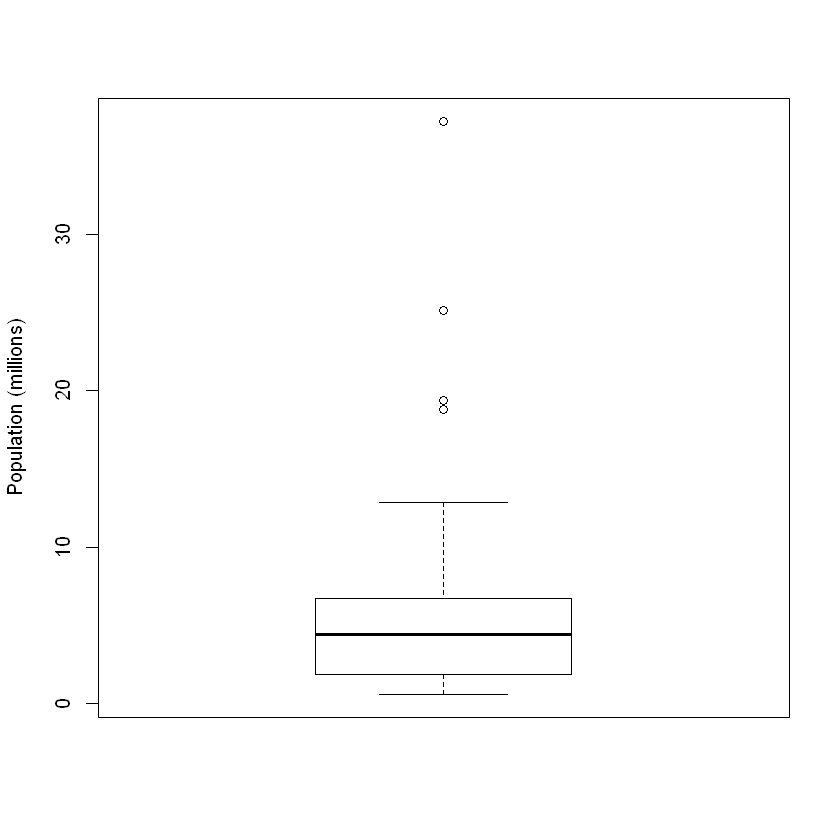

In [15]:
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")
# top of the box = 75th percentile
# bottom of the box = 25th percentile
# horizontal line in the box - median
# dashed lines - whiskers
# R function (by default) - extends whiskers to the furthest point, 
# but not beyond 1.5 times the IQR

In [16]:
breaks <- seq(from=min(state[["Population"]]), to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks, right=TRUE, include.lowest = TRUE)
state['PopFreq'] <- pop_freq
summary(pop_freq)

[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1

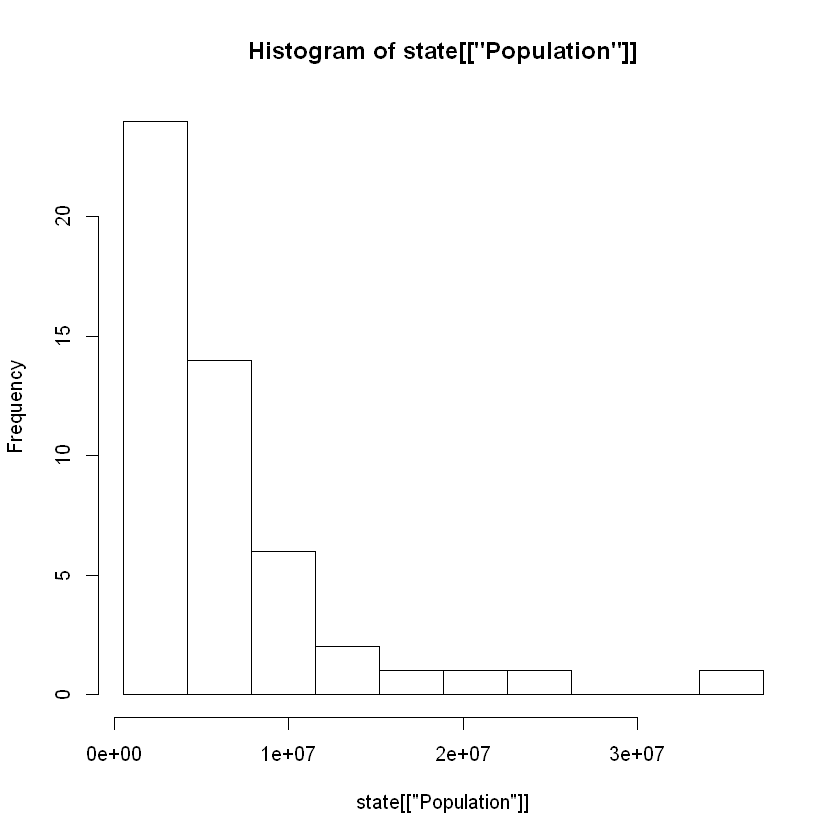

In [41]:
hist(state[["Population"]], breaks=breaks)
# A histogram is a way to visualize a frequency table, \
# with bins on the x-axis and data count on the y-axis

### Density Estimates
- Density Plot
    - shows the distribution of data values as a continuous line
    - (smoothed histogram)
    - it is typically computed directly from the data through a kernal density estimate

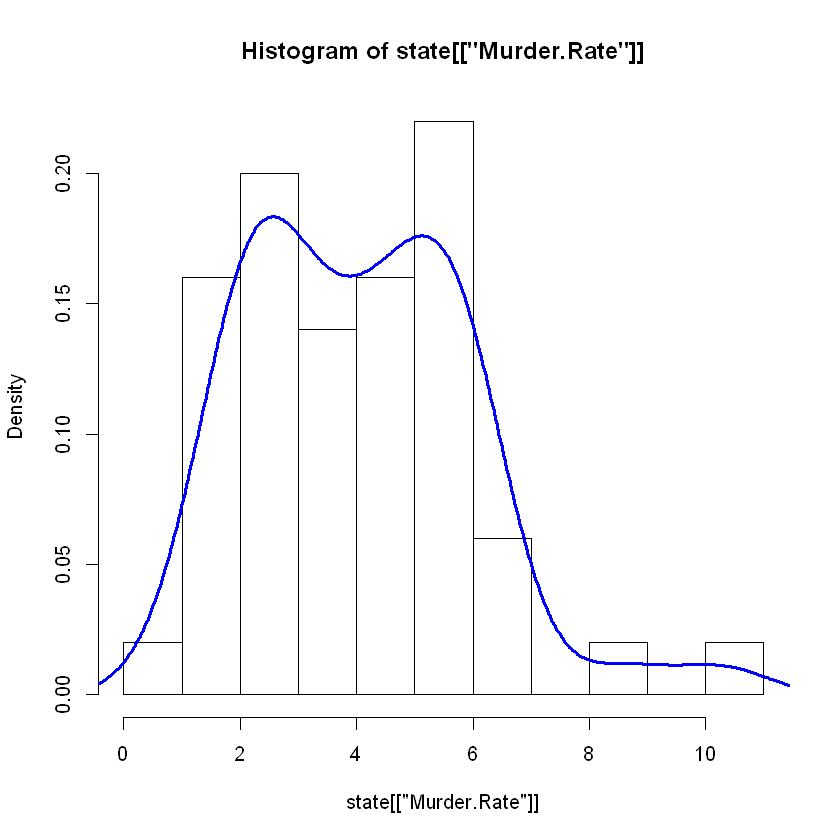

In [42]:
hist(state[["Murder.Rate"]], freq=FALSE)
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

## Exploring Binary and Categorical Data
- For categorical data, simple proportions or percentages tell the story of the data


- Bar charts
    - frequency or proportion for each category plotted as bars
- Pie charts are an alternative to bar charts, although statisticians and data visualization experts generally eschew pie charts as less visually informative
- Mode
    - value that appears most often in the data
- Expected Value
    - A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale
    - a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgment
    
Key Ideas
- Categorical data is typically summed up in proportions, and can be visualized in a bar chart.
- Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or numeric data that has been binned.
- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.